In [1]:
!pip install kmodes==0.12.2


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# from kmodes.kprototypes import KPrototypes

In [3]:
# Carregando os datasets municipios gerais
original_municipios_df = pd.read_csv('./Data/municipios.csv')
municipios_df = original_municipios_df.copy()
original_municipios_df

,codigo_ibge,nome,latitude,longitude,codigo_uf
0,5200050,Abadia de Goiás,-16.75730,-49.4412,52
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,31
2,5200100,Abadiânia,-16.19700,-48.7057,52
3,3100203,Abaeté,-19.15510,-45.4444,31
4,1500107,Abaetetuba,-1.72183,-48.8788,15
...,...,...,...,...,...
5565,2933604,Xique-Xique,-10.82300,-42.7245,29
5566,2517407,Zabelê,-8.07901,-37.1057,25
5567,3557154,Zacarias,-21.05060,-50.0552,35
5568,2114007,Zé Doca,-3.27014,-45.6553,21


In [4]:
# Dataset de municipios apenas do semiárido
original_municipios_semiarido_df = pd.read_csv('./Data/municipios_semiarido.csv')
municipios_semiarido_df = original_municipios_semiarido_df.copy()
original_municipios_semiarido_df

,Cod IBGE,UF,Município,População Estimada - 2017
0,2700102,AL,ÁGUA BRANCA,20467
1,2700300,AL,ARAPIRACA,234185
2,2700706,AL,BATALHA,18757
3,2700904,AL,BELO MONTE,6797
4,2701209,AL,CACIMBINHAS,10897
...,...,...,...,...
1257,2806008,SE,RIBEIRÓPOLIS,18641
1258,2807006,SE,SÃO MIGUEL DO ALEIXO,3943
1259,2807105,SE,SIMÃO DIAS,40838
1260,2807303,SE,TELHA,3221


In [5]:
# Dataset de dados administrativos
original_administrativos_df = pd.read_csv('./Data/administrativos_total_filtrado.csv')
administrativos_total_df = original_administrativos_df.copy()
# Filtra apenas no ano de 2017
mask = administrativos_total_df['ANO'].isin([2013])
administrativos_total_df = administrativos_total_df[mask].reset_index(drop=True, inplace=False)
administrativos_total_df

,ANO,IBGE7,NOME,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,TXCOBPLP,PINTERDRSAI,REN_PIBPC_D,REN_PVAAGR,REN_PVAIND,POP_TOT
0,2013,1100015,Alta Floresta D&apos;Oeste,3.4,9.2,18.32,4.35,12.55,11.12,11.10,34.16,6.27,25728
1,2013,1100023,Ariquemes,3.0,9.1,11.49,4.71,7.97,2.59,14.88,5.79,22.04,101269
2,2013,1100031,Cabixi,1.5,6.9,13.51,3.54,3.48,7.64,12.42,41.45,3.70,6495
3,2013,1100049,Cacoal,2.4,9.3,15.19,4.41,8.68,3.68,13.97,11.02,10.99,85863
4,2013,1100056,Cerejeiras,2.5,8.5,11.07,5.60,3.49,15.28,16.39,15.17,6.68,18041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,2013,5222005,Vianópolis,2.9,13.1,18.29,4.46,6.19,15.19,18.47,36.72,10.18,13227
5566,2013,5222054,Vicentinópolis,4.6,13.3,27.78,6.43,6.30,7.16,27.37,44.75,14.24,7933
5567,2013,5222203,Vila Boa,3.4,10.2,13.33,4.38,0.67,6.63,16.47,38.11,13.20,5246
5568,2013,5222302,Vila Propício,NaN,NaN,0.00,4.40,0.90,4.76,21.92,59.97,10.22,5460


In [6]:
# Dataset de dados do censo
censo_df = pd.read_csv('./Data/censo.csv',delimiter=';')
mask = ["ANO", 
        "Codmun7", 
        "MORT1", "MORT5", 
        "SOBRE40", "SOBRE60", "E_ANOSESTUDO", 
        "T_ANALF11A14", "T_ANALF15A17", "T_ANALF15M", "T_ANALF18A24", "T_ANALF18M", "T_ANALF25A29", "T_ANALF25M", 
        "GINI", "PIND", "PINDCRI", "PMPOB", "PMPOBCRI", "PPOB", "PPOBCRI", 
        "PREN10RICOS", "PREN20", "PREN20RICOS", "PREN40", "PREN60", "PREN80", 
        "RDPC", "RDPC1", "RDPC10", "RDPC2", "RDPC3", "RDPC4", "RDPC5", "RDPCT", "RIND", "RMPOB", "RPOB", 
        "THEIL", "CPR", "EMP", "P_AGRO", "P_COM", "P_CONSTR", "P_EXTR", "P_TRANSF", 
        "REN0", "REN1", "REN2", "REN3", "REN5", "RENOCUP", 
        "T_NESTUDA_NTRAB_MMEIO", "T_OCUPDESLOC_1", "T_RMAXIDOSO", "T_SLUZ", 
        "PEA", "PEA1014", "PEA1517", "PEA18M", "IDHM", "IDHM_E", "IDHM_L", "IDHM_R"]
# NÃO APAGAR "HOMEM0A4", "HOMEM10A14", "HOMEM15A19", "HOMEM20A24", "HOMEM25A29", "HOMEM30A34", "HOMEM35A39", "HOMEM40A44", "HOMEM45A49", "HOMEM50A54", "HOMEM55A59", "HOMEM5A9", "HOMEM60A64", "HOMEM65A69", "HOMEM70A74", "HOMEM75A79", "HOMEMTOT", "HOMENS80", "MULH0A4", "MULH10A14", "MULH15A19", "MULH20A24", "MULH25A29", "MULH30A34", "MULH35A39", "MULH40A44", "MULH45A49", "MULH50A54", "MULH55A59", "MULH5A9", "MULH60A64", "MULH65A69", "MULH70A74", "MULH75A79", "MULHER80", "MULHERTOT",
censo_df = censo_df[mask]
censo_df = censo_df[censo_df["ANO"] == 2010]
censo_df

,ANO,Codmun7,MORT1,MORT5,SOBRE40,SOBRE60,E_ANOSESTUDO,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,...,T_RMAXIDOSO,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R
11130,2010,1100015,23.80,25.49,94.50,83.18,8.67,1.22,1.52,11.99,...,2.20,6.02,10611.0,218.0,464.0,9928.0,0.641,0.526,0.763,0.657
11131,2010,1100023,19.20,20.53,96.12,87.69,9.18,1.55,1.09,7.90,...,1.40,1.42,45300.0,730.0,1769.0,42801.0,0.702,0.600,0.806,0.716
11132,2010,1100031,24.80,26.58,94.27,82.57,10.09,0.62,1.06,13.63,...,3.10,3.64,2869.0,73.0,148.0,2648.0,0.650,0.559,0.757,0.650
11133,2010,1100049,14.30,15.38,96.41,88.56,9.74,1.01,0.80,8.29,...,1.84,1.11,40083.0,882.0,1884.0,37317.0,0.718,0.620,0.821,0.727
11134,2010,1100056,18.10,19.42,95.78,86.72,10.22,1.14,0.75,10.29,...,1.43,1.15,8699.0,172.0,395.0,8133.0,0.692,0.602,0.799,0.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,2010,5222005,14.40,17.04,93.03,82.02,10.11,0.66,0.74,7.97,...,1.33,0.17,6657.0,122.0,334.0,6201.0,0.712,0.622,0.818,0.710
16691,2010,5222054,15.70,18.51,92.47,80.75,10.07,1.22,1.32,12.68,...,1.25,0.30,3922.0,84.0,175.0,3663.0,0.684,0.562,0.804,0.707
16692,2010,5222203,14.50,17.09,93.02,81.98,10.49,3.60,1.56,15.88,...,3.81,0.22,2008.0,18.0,28.0,1962.0,0.647,0.534,0.818,0.619
16693,2010,5222302,15.90,18.80,92.36,80.50,9.46,4.15,1.99,19.25,...,4.48,2.41,2200.0,48.0,76.0,2076.0,0.634,0.505,0.802,0.629


<img src="image-20231006-022215.png" width="" align="" />

In [7]:
# Precisamos converter todos os nomes para lowercase para o merge funcionar
municipios_df['nome'] = municipios_df['nome'].str.upper()
# municipios_semiarido_df['Município'] = municipios_semiarido_df['Município'].str.upper()
# administrativos_total_df['NOME'] = administrativos_total_df['NOME'].str.upper()
# censo_df['Município'] = censo_df['Município'].str.upper()

# Juntando os datasets
merged_municipios_df = pd.merge(municipios_df, municipios_semiarido_df, left_on='codigo_ibge', right_on='Cod IBGE')
merged_municipios_df = pd.merge(merged_municipios_df, administrativos_total_df, left_on='codigo_ibge', right_on='IBGE7')
merged_municipios_df = pd.merge(merged_municipios_df, censo_df, left_on='codigo_ibge', right_on='Codmun7')
merged_municipios_df.drop(['Município', 'Cod IBGE', 'NOME', 'População Estimada - 2017', 'IBGE7', 'ANO_x', 'ANO_y', 'Codmun7'], axis=1, inplace=True)
# merged_municipios_df.drop(['Município', 'Cod IBGE', 'NOME', 'População Estimada - 2017', 'IBGE7'], axis=1, inplace=True)
# merged_municipios_df['População Estimada - 2017'] = merged_municipios_df['População Estimada - 2017'].astype(int)
merged_municipios_df

,codigo_ibge,nome,latitude,longitude,codigo_uf,UF,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,...,T_RMAXIDOSO,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2300101,ABAIARA,-7.34588,-39.0416,23,CE,2.4,5.9,17.24,5.23,...,8.04,0.64,3796.0,116.0,198.0,3481.0,0.628,0.612,0.748,0.540
1,2900108,ABAÍRA,-13.24880,-41.6619,29,BA,4.4,16.5,55.56,5.58,...,5.35,2.31,3668.0,98.0,114.0,3455.0,0.603,0.510,0.746,0.577
2,2900207,ABARÉ,-8.72073,-39.1162,29,BA,3.5,11.5,6.90,3.74,...,8.76,9.17,6808.0,357.0,328.0,6123.0,0.575,0.460,0.776,0.533
3,2300150,ACARAPE,-4.22083,-38.7055,23,CE,4.3,16.0,20.58,5.18,...,5.39,0.57,5407.0,49.0,177.0,5181.0,0.606,0.562,0.709,0.559
4,2300200,ACARAÚ,-2.88769,-40.1183,23,CE,3.1,10.3,17.56,5.12,...,5.80,4.42,22732.0,791.0,1043.0,20898.0,0.601,0.517,0.758,0.554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2933406,WAGNER,-12.28190,-41.1715,29,BA,4.8,8.3,7.75,6.31,...,4.09,3.87,4002.0,82.0,152.0,3768.0,0.587,0.479,0.737,0.573
1258,2211704,WALL FERRAZ,-7.23151,-41.9050,22,PI,2.2,18.5,0.00,4.36,...,6.97,3.21,1450.0,26.0,65.0,1359.0,0.544,0.443,0.708,0.513
1259,2933455,WANDERLEY,-12.11440,-43.8958,29,BA,4.7,6.4,21.39,4.74,...,4.08,14.26,5243.0,228.0,208.0,4806.0,0.600,0.498,0.764,0.569
1260,2933604,XIQUE-XIQUE,-10.82300,-42.7245,29,BA,6.1,11.7,17.07,5.24,...,6.14,4.86,18610.0,715.0,1007.0,16888.0,0.585,0.479,0.741,0.563


In [8]:
# Exclui cidades sem dados
display(merged_municipios_df.isnull().sum())
merged_municipios_df.dropna(inplace=True)
merged_municipios_df

codigo_ibge    0
nome           0
latitude       0
longitude      0
codigo_uf      0
              ..
PEA18M         0
IDHM           0
IDHM_E         0
IDHM_L         0
IDHM_R         0
Length: 78, dtype: int64

,codigo_ibge,nome,latitude,longitude,codigo_uf,UF,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,...,T_RMAXIDOSO,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R
0,2300101,ABAIARA,-7.34588,-39.0416,23,CE,2.4,5.9,17.24,5.23,...,8.04,0.64,3796.0,116.0,198.0,3481.0,0.628,0.612,0.748,0.540
1,2900108,ABAÍRA,-13.24880,-41.6619,29,BA,4.4,16.5,55.56,5.58,...,5.35,2.31,3668.0,98.0,114.0,3455.0,0.603,0.510,0.746,0.577
2,2900207,ABARÉ,-8.72073,-39.1162,29,BA,3.5,11.5,6.90,3.74,...,8.76,9.17,6808.0,357.0,328.0,6123.0,0.575,0.460,0.776,0.533
3,2300150,ACARAPE,-4.22083,-38.7055,23,CE,4.3,16.0,20.58,5.18,...,5.39,0.57,5407.0,49.0,177.0,5181.0,0.606,0.562,0.709,0.559
4,2300200,ACARAÚ,-2.88769,-40.1183,23,CE,3.1,10.3,17.56,5.12,...,5.80,4.42,22732.0,791.0,1043.0,20898.0,0.601,0.517,0.758,0.554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2933406,WAGNER,-12.28190,-41.1715,29,BA,4.8,8.3,7.75,6.31,...,4.09,3.87,4002.0,82.0,152.0,3768.0,0.587,0.479,0.737,0.573
1258,2211704,WALL FERRAZ,-7.23151,-41.9050,22,PI,2.2,18.5,0.00,4.36,...,6.97,3.21,1450.0,26.0,65.0,1359.0,0.544,0.443,0.708,0.513
1259,2933455,WANDERLEY,-12.11440,-43.8958,29,BA,4.7,6.4,21.39,4.74,...,4.08,14.26,5243.0,228.0,208.0,4806.0,0.600,0.498,0.764,0.569
1260,2933604,XIQUE-XIQUE,-10.82300,-42.7245,29,BA,6.1,11.7,17.07,5.24,...,6.14,4.86,18610.0,715.0,1007.0,16888.0,0.585,0.479,0.741,0.563


In [9]:
# Plot geográfico
fig = px.scatter_mapbox(merged_municipios_df, lat='latitude', lon='longitude', 
                        hover_name='nome', size='POP_TOT', color='UF',
                        mapbox_style='stamen-toner', center=dict(lat=-12.83, lon=-36.49), zoom=4.5)
# fig.update_geos(
#     resolution=50,
#     showcoastlines=True, coastlinecolor="RebeccaPurple",
#     showland=True, landcolor="LightGreen",
#     showocean=True, oceancolor="LightBlue",
#     showlakes=False, lakecolor="Blue",
#     showrivers=True, rivercolor="Blue",
#     scope="south america",
#     mapbox_style="stamen-terrain"
# )

fig.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_traces(marker=dict(color='DarkBlue'))
# fig.update_layout(
#     mapbox_style="white-bg",
#     mapbox_layers=[
#         {
#             "below": 'traces',
#             "sourcetype": "raster",
#             "sourceattribution": "United States Geological Survey",
#             "source": [
#                 "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
#             ]
#         }
#       ],)
fig.show()

# Algoritmo para escolha de features

Foi implementado um algorítmo para avaliar as melhores features na clusterização de um determinado modelo. Nele, utilizamos o score do silhouette para determinar o quanto uma variável influencia positivamente a formação dos clusters.

Silhouette Coefficient ou silhouette score é uma métrica usada para calcular a qualidade de uma técnica de agrupamento (clustering). Seu valor varia de -1 a 1.

- 1: Significa que os clusters estão bem separados uns dos outros e claramente distintos. 

- 0: Significa que os clusters são indiferentes, ou podemos dizer que a distância entre os clusters não é significativa. 

- -1: significa que os clusters foram atribuídos de maneira errada.

O algorítmo apresenta a seguinte lógica:

1. Executar clusterização em cada um das variáveis individualmente para algum k.
2. Para cada cluster, é medido uma métrica de desempenho, como o coeficiente de silhueta implementado aqui.
3. A variável que oferece o melhor desempenho é salva numa lista.
4. O passo 2 e 3 são repetidos, porém, cada iteração as variáveis já escolhidas e salvas na lista são treinadas juntamente com as novas candidatas em busca de uma melhor performance. 
5. O critério de parada pode ser um número de variáveis desejada ou um ponto em que a métrica de desempenho não melhore significativamente. (ainda não implementado)

In [10]:
# Função auxiliar para escolha de melhor variável
def find_best_feature(cluster_model, data_df, features_selected):
    # Setar variaveis de melhor candidato e score
    best_feature_candidate = None
    best_score = -1
    
    data_array = data_df.values

    for feature_candidate in data_df.columns:
        # Verifique se a variável já foi selecionada.
        if feature_candidate not in features_selected:
            # Copia as variáveis selecionadas até agora e adiciona nova característica candidata.
            selected_features = features_selected + [feature_candidate]
            # Transformar o DataFrame em uma matriz numpy para treinar modelo
            current_data = data_df[selected_features].values

            # Executar o modelo de cluster
            clusters = cluster_model.fit_predict(current_data)
            # Calcular o índice de melhor desempenho.
            score = silhouette_score(current_data, clusters)

            # Se o valor do score for melhor do que o melhor até agora, atualize
            if score > best_score:
                best_score = score
                best_feature_candidate = feature_candidate

    return best_score, best_feature_candidate


# Função acha os melhores features de um dataset para se realizar um cluster
def cluster_feature_optimizer(cluster_model, data_df, desired_num_features=5):
    # Array com índices dos melhores features
    features_selected = []
    # Array com nomes das colunas que não foram selecionadas
    remaining_features = data_df.columns.tolist()

    while len(features_selected) < desired_num_features and remaining_features:
        best_score, best_feature_candidate = find_best_feature(cluster_model, data_df, features_selected)

        # Salvar a melhor característica ao array
        features_selected.append(best_feature_candidate)
        remaining_features.remove(best_feature_candidate)
        print(best_feature_candidate)

    return features_selected

# Clusterização

## Por população

In [11]:
municipios_cluster_array = merged_municipios_df['POP_TOT'].values.reshape(-1,1)
municipios_cluster_array

array([[11089],
       [ 9132],
       [18989],
       ...,
       [13089],
       [48100],
       [ 2169]])

K-Means clustering

In [12]:
# Determinação do número de centroides pelo método do cotovelo
centroids_max = 10
clusters_list = []
losses = []
for i in range(2,centroids_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', verbose=0, max_iter=30)
    # kproto = KPrototypes(n_clusters=i, verbose=0, max_iter=30)
    clusters = kmeans.fit_predict(municipios_cluster_array)
    losses.append(kmeans.inertia_)
print('Otimização finalizada!')

Otimização finalizada!


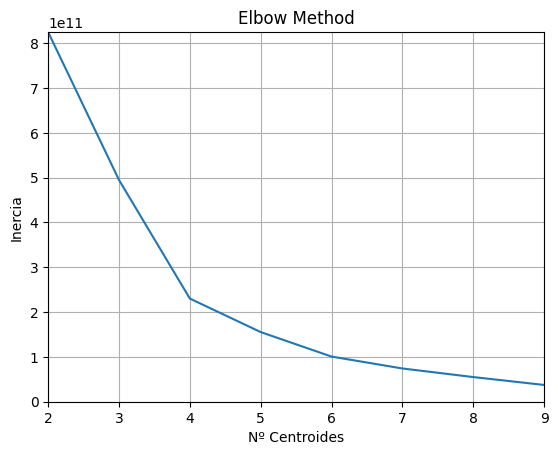

In [13]:
plt.plot(range(2,centroids_max), losses, color='tab:blue')
plt.xlabel('Nº Centroides')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.xlim([2,9])
plt.ylim([0, max(losses)])
plt.grid()

In [14]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, verbose=1, init='k-means++', max_iter=100)
clusters = kmeans.fit_predict(municipios_cluster_array)

centroids = kmeans.cluster_centers_
print(f'Silhouette Score: {silhouette_score(municipios_cluster_array, clusters)}')

Initialization complete
Iteration 0, inertia 452906755221.0.
Iteration 1, inertia 386288565865.0456.
Iteration 2, inertia 365414317310.5074.
Iteration 3, inertia 358691968429.52094.
Iteration 4, inertia 346818099389.2585.
Iteration 5, inertia 314720403813.3899.
Iteration 6, inertia 268541750822.72827.
Iteration 7, inertia 240942803430.44397.
Iteration 8, inertia 232341783708.12787.
Iteration 9, inertia 231008399889.49103.
Iteration 10, inertia 230699367215.94168.
Iteration 11, inertia 230450510014.4556.
Iteration 12, inertia 230348316429.64258.
Iteration 13, inertia 230261525940.8507.
Iteration 14, inertia 230172975911.43997.
Converged at iteration 14: center shift 42701.38347762391 within tolerance 181417.25175580257.
Initialization complete
Iteration 0, inertia 511673106012.0.
Iteration 1, inertia 384196465219.9937.
Iteration 2, inertia 369182828633.9532.
Iteration 3, inertia 368844912593.4253.
Converged at iteration 3: center shift 11313.305317573295 within tolerance 181417.25175580

In [15]:
merged_municipios_df['cluster'] = clusters.astype(str)
merged_municipios_df

,codigo_ibge,nome,latitude,longitude,codigo_uf,UF,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,...,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R,cluster
0,2300101,ABAIARA,-7.34588,-39.0416,23,CE,2.4,5.9,17.24,5.23,...,0.64,3796.0,116.0,198.0,3481.0,0.628,0.612,0.748,0.540,0
1,2900108,ABAÍRA,-13.24880,-41.6619,29,BA,4.4,16.5,55.56,5.58,...,2.31,3668.0,98.0,114.0,3455.0,0.603,0.510,0.746,0.577,0
2,2900207,ABARÉ,-8.72073,-39.1162,29,BA,3.5,11.5,6.90,3.74,...,9.17,6808.0,357.0,328.0,6123.0,0.575,0.460,0.776,0.533,0
3,2300150,ACARAPE,-4.22083,-38.7055,23,CE,4.3,16.0,20.58,5.18,...,0.57,5407.0,49.0,177.0,5181.0,0.606,0.562,0.709,0.559,0
4,2300200,ACARAÚ,-2.88769,-40.1183,23,CE,3.1,10.3,17.56,5.12,...,4.42,22732.0,791.0,1043.0,20898.0,0.601,0.517,0.758,0.554,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2933406,WAGNER,-12.28190,-41.1715,29,BA,4.8,8.3,7.75,6.31,...,3.87,4002.0,82.0,152.0,3768.0,0.587,0.479,0.737,0.573,0
1258,2211704,WALL FERRAZ,-7.23151,-41.9050,22,PI,2.2,18.5,0.00,4.36,...,3.21,1450.0,26.0,65.0,1359.0,0.544,0.443,0.708,0.513,0
1259,2933455,WANDERLEY,-12.11440,-43.8958,29,BA,4.7,6.4,21.39,4.74,...,14.26,5243.0,228.0,208.0,4806.0,0.600,0.498,0.764,0.569,0
1260,2933604,XIQUE-XIQUE,-10.82300,-42.7245,29,BA,6.1,11.7,17.07,5.24,...,4.86,18610.0,715.0,1007.0,16888.0,0.585,0.479,0.741,0.563,2


In [16]:
fig = px.scatter_mapbox(
    merged_municipios_df,
    lat='latitude',
    lon='longitude',
    hover_name='nome',
    size='POP_TOT',
    color='cluster',  # Coluna 'cluster' determinar cores
    color_continuous_scale='Viridis',  # Escala de cores
    mapbox_style='stamen-toner',
    center=dict(lat=-12.83, lon=-36.49),
    zoom=4.5
)

fig.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [17]:
# Identifica clusters mais populosos
mean_pop = []
for i in range(n_clusters):
    mask = merged_municipios_df['cluster'].isin([str(i)])
    _len = merged_municipios_df[mask]['POP_TOT'].shape[0]
    _val = sum(merged_municipios_df[mask]['POP_TOT'].values)
    # Lista contendo médias de população de cada cluster
    mean_pop.append(_val / _len)

# Cria uma lista contendo os clusters mais populosos
_temp = mean_pop.copy()
_temp.sort()
highest_clusters = [str(mean_pop.index(_temp[-1])), str(mean_pop.index(_temp[-2]))]
highest_clusters
print(f'Clusters com maior população: {highest_clusters}')

# Remove clusters selecionados
mask = merged_municipios_df['cluster'].isin(highest_clusters)
lowPop_municipios_df = merged_municipios_df[~mask]
lowPop_municipios_df

Clusters com maior população: ['3', '1']


,codigo_ibge,nome,latitude,longitude,codigo_uf,UF,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,...,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R,cluster
0,2300101,ABAIARA,-7.34588,-39.0416,23,CE,2.4,5.9,17.24,5.23,...,0.64,3796.0,116.0,198.0,3481.0,0.628,0.612,0.748,0.540,0
1,2900108,ABAÍRA,-13.24880,-41.6619,29,BA,4.4,16.5,55.56,5.58,...,2.31,3668.0,98.0,114.0,3455.0,0.603,0.510,0.746,0.577,0
2,2900207,ABARÉ,-8.72073,-39.1162,29,BA,3.5,11.5,6.90,3.74,...,9.17,6808.0,357.0,328.0,6123.0,0.575,0.460,0.776,0.533,0
3,2300150,ACARAPE,-4.22083,-38.7055,23,CE,4.3,16.0,20.58,5.18,...,0.57,5407.0,49.0,177.0,5181.0,0.606,0.562,0.709,0.559,0
4,2300200,ACARAÚ,-2.88769,-40.1183,23,CE,3.1,10.3,17.56,5.12,...,4.42,22732.0,791.0,1043.0,20898.0,0.601,0.517,0.758,0.554,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2933406,WAGNER,-12.28190,-41.1715,29,BA,4.8,8.3,7.75,6.31,...,3.87,4002.0,82.0,152.0,3768.0,0.587,0.479,0.737,0.573,0
1258,2211704,WALL FERRAZ,-7.23151,-41.9050,22,PI,2.2,18.5,0.00,4.36,...,3.21,1450.0,26.0,65.0,1359.0,0.544,0.443,0.708,0.513,0
1259,2933455,WANDERLEY,-12.11440,-43.8958,29,BA,4.7,6.4,21.39,4.74,...,14.26,5243.0,228.0,208.0,4806.0,0.600,0.498,0.764,0.569,0
1260,2933604,XIQUE-XIQUE,-10.82300,-42.7245,29,BA,6.1,11.7,17.07,5.24,...,4.86,18610.0,715.0,1007.0,16888.0,0.585,0.479,0.741,0.563,2


In [18]:
fig = px.scatter_mapbox(
    lowPop_municipios_df,
    lat='latitude',
    lon='longitude',
    hover_name='nome',
    size='POP_TOT',
    color='cluster',  # Coluna 'cluster' determinar cores
    color_continuous_scale='Viridis',  # Escala de cores
    mapbox_style='stamen-toner',
    center=dict(lat=-12.83, lon=-36.49),
    zoom=4.5
)

fig.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Por caracteristicas

In [32]:
lowPop_cluster_array = lowPop_municipios_df.drop(['codigo_ibge', 'nome', 'codigo_uf', 'UF', 'latitude', 'longitude', 'POP_TOT'], axis=1).values
lowPop_cluster_array

array([[2.4, 5.9, 17.24, ..., 0.748, 0.54, '0'],
       [4.4, 16.5, 55.56, ..., 0.746, 0.577, '0'],
       [3.5, 11.5, 6.9, ..., 0.776, 0.533, '0'],
       ...,
       [4.7, 6.4, 21.39, ..., 0.764, 0.569, '0'],
       [6.1, 11.7, 17.07, ..., 0.741, 0.563, '2'],
       [1.1, 11.3, 0.0, ..., 0.725, 0.567, '0']], dtype=object)

In [33]:
kmeans = KMeans(n_clusters=3, verbose=1, init='k-means++', max_iter=100)
clusters = kmeans.fit_predict(lowPop_cluster_array)

centroids = kmeans.cluster_centers_
centroids

Initialization complete
Iteration 0, inertia 43638427670.06556.
Iteration 1, inertia 32474346530.25679.
Iteration 2, inertia 31282497999.313995.
Iteration 3, inertia 31113305523.423443.
Iteration 4, inertia 31094105291.980747.
Iteration 5, inertia 31081717301.788845.
Iteration 6, inertia 31071867591.454453.
Iteration 7, inertia 31062913719.030266.
Iteration 8, inertia 31053256972.07432.
Iteration 9, inertia 31052971822.475048.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 38388958141.13011.
Iteration 1, inertia 31725142717.04798.
Iteration 2, inertia 31447117080.71923.
Iteration 3, inertia 31386093521.080738.
Iteration 4, inertia 31378040944.474506.
Iteration 5, inertia 31345731076.4273.
Iteration 6, inertia 31311587761.783257.
Iteration 7, inertia 31231822809.14349.
Iteration 8, inertia 31163958874.716354.
Iteration 9, inertia 31152104903.89473.
Iteration 10, inertia 31143028902.229538.
Iteration 11, inertia 31138960673.924816.
Iteration 12

array([[4.25043478e+00, 1.16247826e+01, 1.59623478e+01, 5.80556522e+00,
        2.35178261e+00, 7.55830435e+00, 6.56586957e+00, 1.19641304e+01,
        1.05798696e+01, 2.55017826e+01, 2.75830435e+01, 9.38568696e+01,
        8.23710435e+01, 8.93786957e+00, 6.47626087e+00, 4.61873913e+00,
        2.64992174e+01, 7.01517391e+00, 2.86450000e+01, 1.29848261e+01,
        3.40290435e+01, 5.36521739e-01, 2.08315652e+01, 2.94545652e+01,
        3.96882174e+01, 5.50053043e+01, 6.48984783e+01, 8.00660870e+01,
        4.06043043e+01, 2.52239130e+00, 5.67693913e+01, 9.71043478e+00,
        2.23269565e+01, 4.32306087e+01, 2.96062174e+02, 3.86911739e+01,
        1.21109578e+03, 1.07958217e+02, 1.86375696e+02, 3.06404522e+02,
        8.40590304e+02, 3.01419565e+02, 3.37603478e+01, 6.95553478e+01,
        1.19745261e+02, 5.46739130e-01, 2.53700435e+01, 1.01313043e+00,
        4.11850435e+01, 1.21132609e+01, 6.34430435e+00, 3.95521739e-01,
        7.01586957e+00, 2.10297826e+01, 6.11950000e+01, 9.135782

In [34]:
lowPop_municipios_df['cluster'] = clusters.astype(str)
lowPop_municipios_df

/tmp/ipykernel_658/284707455.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,codigo_ibge,nome,latitude,longitude,codigo_uf,UF,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,...,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R,cluster
0,2300101,ABAIARA,-7.34588,-39.0416,23,CE,2.4,5.9,17.24,5.23,...,0.64,3796.0,116.0,198.0,3481.0,0.628,0.612,0.748,0.540,2
1,2900108,ABAÍRA,-13.24880,-41.6619,29,BA,4.4,16.5,55.56,5.58,...,2.31,3668.0,98.0,114.0,3455.0,0.603,0.510,0.746,0.577,2
2,2900207,ABARÉ,-8.72073,-39.1162,29,BA,3.5,11.5,6.90,3.74,...,9.17,6808.0,357.0,328.0,6123.0,0.575,0.460,0.776,0.533,2
3,2300150,ACARAPE,-4.22083,-38.7055,23,CE,4.3,16.0,20.58,5.18,...,0.57,5407.0,49.0,177.0,5181.0,0.606,0.562,0.709,0.559,2
4,2300200,ACARAÚ,-2.88769,-40.1183,23,CE,3.1,10.3,17.56,5.12,...,4.42,22732.0,791.0,1043.0,20898.0,0.601,0.517,0.758,0.554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2933406,WAGNER,-12.28190,-41.1715,29,BA,4.8,8.3,7.75,6.31,...,3.87,4002.0,82.0,152.0,3768.0,0.587,0.479,0.737,0.573,2
1258,2211704,WALL FERRAZ,-7.23151,-41.9050,22,PI,2.2,18.5,0.00,4.36,...,3.21,1450.0,26.0,65.0,1359.0,0.544,0.443,0.708,0.513,2
1259,2933455,WANDERLEY,-12.11440,-43.8958,29,BA,4.7,6.4,21.39,4.74,...,14.26,5243.0,228.0,208.0,4806.0,0.600,0.498,0.764,0.569,2
1260,2933604,XIQUE-XIQUE,-10.82300,-42.7245,29,BA,6.1,11.7,17.07,5.24,...,4.86,18610.0,715.0,1007.0,16888.0,0.585,0.479,0.741,0.563,0


In [35]:
fig = px.scatter_mapbox(
    lowPop_municipios_df,
    lat='latitude',
    lon='longitude',
    hover_name='nome',
    size='POP_TOT',
    color='cluster',  # Coluna 'cluster' determinar cores
    color_continuous_scale='Viridis',  # Escala de cores
    mapbox_style='stamen-toner',
    center=dict(lat=-12.83, lon=-36.49),
    zoom=4.5
)

fig.update_layout(height=700, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [36]:
print(f'Silhouette Score: {silhouette_score(lowPop_cluster_array, clusters)}')

Silhouette Score: 0.6576400631707658


# Cidades do bem

Cidades do bem

<img src="cidades do bem.png" width="75%" align="" />

<img src="cidades do bem 2.png" width="75%" align="" />

In [37]:
municipios_do_bem = [
                    'INAJÁ',
                    'BUÍQUE',
                    'SÃO JOSÉ DA TAPERA',
                    'MAURITI'
                    ]
                    
mask = lowPop_municipios_df['nome'].isin(municipios_do_bem)
municipios_do_bem_df = lowPop_municipios_df[mask]

municipios_do_bem_df

,codigo_ibge,nome,latitude,longitude,codigo_uf,UF,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,...,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R,cluster
185,2602803,BUÍQUE,-8.61954,-37.1606,26,PE,5.0,10.7,9.39,5.41,...,2.53,18171.0,1110.0,1120.0,15941.0,0.527,0.395,0.746,0.497,0
487,2607000,INAJÁ,-8.90206,-37.8351,26,PE,5.6,8.0,42.61,3.90,...,1.95,6880.0,389.0,378.0,6114.0,0.523,0.400,0.711,0.503,2
696,2308104,MAURITI,-7.38597,-38.7708,23,CE,2.6,10.0,17.70,5.13,...,1.01,17211.0,626.0,951.0,15634.0,0.605,0.526,0.772,0.544,0
1069,2708402,SÃO JOSÉ DA TAPERA,-9.55768,-37.3831,27,AL,5.8,15.2,21.89,5.49,...,1.94,12581.0,1360.0,1112.0,10110.0,0.527,0.409,0.703,0.508,0


In [38]:
# Removendo cluster 1
mask = lowPop_municipios_df['cluster'].isin(['1'])
bemLike_municipios_df = lowPop_municipios_df[~mask]
bemLike_municipios_df

,codigo_ibge,nome,latitude,longitude,codigo_uf,UF,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,...,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R,cluster
0,2300101,ABAIARA,-7.34588,-39.0416,23,CE,2.4,5.9,17.24,5.23,...,0.64,3796.0,116.0,198.0,3481.0,0.628,0.612,0.748,0.540,2
1,2900108,ABAÍRA,-13.24880,-41.6619,29,BA,4.4,16.5,55.56,5.58,...,2.31,3668.0,98.0,114.0,3455.0,0.603,0.510,0.746,0.577,2
2,2900207,ABARÉ,-8.72073,-39.1162,29,BA,3.5,11.5,6.90,3.74,...,9.17,6808.0,357.0,328.0,6123.0,0.575,0.460,0.776,0.533,2
3,2300150,ACARAPE,-4.22083,-38.7055,23,CE,4.3,16.0,20.58,5.18,...,0.57,5407.0,49.0,177.0,5181.0,0.606,0.562,0.709,0.559,2
4,2300200,ACARAÚ,-2.88769,-40.1183,23,CE,3.1,10.3,17.56,5.12,...,4.42,22732.0,791.0,1043.0,20898.0,0.601,0.517,0.758,0.554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2933406,WAGNER,-12.28190,-41.1715,29,BA,4.8,8.3,7.75,6.31,...,3.87,4002.0,82.0,152.0,3768.0,0.587,0.479,0.737,0.573,2
1258,2211704,WALL FERRAZ,-7.23151,-41.9050,22,PI,2.2,18.5,0.00,4.36,...,3.21,1450.0,26.0,65.0,1359.0,0.544,0.443,0.708,0.513,2
1259,2933455,WANDERLEY,-12.11440,-43.8958,29,BA,4.7,6.4,21.39,4.74,...,14.26,5243.0,228.0,208.0,4806.0,0.600,0.498,0.764,0.569,2
1260,2933604,XIQUE-XIQUE,-10.82300,-42.7245,29,BA,6.1,11.7,17.07,5.24,...,4.86,18610.0,715.0,1007.0,16888.0,0.585,0.479,0.741,0.563,0


# Análise de features do cluster

- Remove highly correlated features: Correlated features can affect the performance of the k-means algorithm, so it is often a good idea to remove them.

- Remove features with low variance: Features that do not vary much can be removed as they do not provide much information.

- Remove features with low relevance: Features that are not relevant to the problem can be removed.

- Remove features with low mutual information: Features that have low mutual information with the target variable can be removed.

- Remove features with low silhouette score: Features that have a low silhouette score can be removed as they do not contribute much to the clustering.

## Silhouette Coefficient

In [39]:
print(f'Silhouette Score: {silhouette_score(lowPop_cluster_array, clusters)}')

Silhouette Score: 0.6576400631707658


In [40]:
print(f'Calinski-Harabasz score: {calinski_harabasz_score(lowPop_cluster_array, clusters)}')

Calinski-Harabasz score: 2391.3582315804947


## PCA

Utilizar a Análise de Componentes Principais (PCA) em conjunto com o algoritmo K-Means é uma abordagem comum para redução de dimensionalidade e identificação de quais características (features) são relevantes para o agrupamento. A PCA ajuda a encontrar as direções principais (componentes principais) nos dados, reduzindo a dimensionalidade enquanto mantém a maior parte da variabilidade. Aqui está um guia passo a passo de como fazer isso:

In [64]:
from sklearn.decomposition import PCA
df = lowPop_municipios_df.drop(['codigo_ibge', 'nome', 'codigo_uf', 'UF', 'latitude', 'longitude', 'POP_TOT', 'cluster'], axis=1)
array = df.values

pca = PCA(n_components=6)  # Escolha o número de componentes principais desejado
X_pca = pca.fit_transform(df)

In [65]:
loadings_df = pd.DataFrame(pca.components_, columns=df.columns)
loadings_df

,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TXMOINF,TXBRUTAMORT,TXCOBPLP,PINTERDRSAI,REN_PIBPC_D,REN_PVAAGR,REN_PVAIND,MORT1,...,T_RMAXIDOSO,T_SLUZ,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R
0,-0.000003,-0.000012,-0.000023,0.000003,0.000090,-0.000052,0.000071,-0.000084,0.000227,-0.000114,...,-0.000030,-0.000076,0.727237,0.014753,0.027151,0.685330,0.000001,0.000002,6.575190e-07,0.000002
1,-0.000980,-0.000948,-0.001181,0.000627,0.002512,0.000927,0.002536,-0.003894,0.008144,-0.004118,...,-0.001274,-0.002172,-0.222983,-0.248118,-0.195554,0.220667,0.000060,0.000069,2.295940e-05,0.000073
2,-0.000579,0.000537,-0.000772,0.000057,0.000317,-0.000689,0.000191,-0.001493,-0.000299,-0.000973,...,0.000717,-0.000157,-0.409792,-0.462644,-0.423266,0.475968,0.000005,0.000030,3.813403e-06,-0.000024
3,-0.003021,-0.000049,-0.000162,0.000189,0.006283,-0.005296,0.009206,-0.003463,0.044055,-0.014245,...,-0.007506,-0.017029,0.057691,-0.179279,0.307250,-0.070264,0.000133,0.000161,6.977178e-05,0.000137
4,0.000728,0.002579,-0.008284,-0.001116,-0.004353,-0.010750,-0.004064,0.013135,-0.033758,0.001034,...,0.002560,0.007946,-0.006603,-0.661531,0.658518,-0.003877,-0.000044,-0.000042,-1.287263e-05,-0.000064
5,0.003650,0.012165,0.007339,-0.007167,0.003372,-0.011868,0.005678,0.008039,0.036743,0.002197,...,0.006467,0.010329,0.005796,0.054673,-0.043117,-0.006259,-0.000090,-0.000095,-1.130231e-05,-0.000135


In [66]:
kmeans = KMeans(n_clusters=6)  # Escolha o número de clusters desejado
clusters = kmeans.fit(X_pca)
labels = kmeans.labels_

In [67]:
print(f'Silhouette Score: {silhouette_score(X_pca, labels)}')

Silhouette Score: 0.5562632875869993


Ficou pior lol

### Teste do algorítmo ( deve ser deletado dps e aplicado onde desejar)

In [46]:
lowPop_municipios_df.columns.tolist()

['codigo_ibge',
 'nome',
 'latitude',
 'longitude',
 'codigo_uf',
 'UF',
 'TTREVA_EF_TOTAL',
 'TTREVA_EM_TOTAL',
 'TXMOINF',
 'TXBRUTAMORT',
 'TXCOBPLP',
 'PINTERDRSAI',
 'REN_PIBPC_D',
 'REN_PVAAGR',
 'REN_PVAIND',
 'POP_TOT',
 'MORT1',
 'MORT5',
 'SOBRE40',
 'SOBRE60',
 'E_ANOSESTUDO',
 'T_ANALF11A14',
 'T_ANALF15A17',
 'T_ANALF15M',
 'T_ANALF18A24',
 'T_ANALF18M',
 'T_ANALF25A29',
 'T_ANALF25M',
 'GINI',
 'PIND',
 'PINDCRI',
 'PMPOB',
 'PMPOBCRI',
 'PPOB',
 'PPOBCRI',
 'PREN10RICOS',
 'PREN20',
 'PREN20RICOS',
 'PREN40',
 'PREN60',
 'PREN80',
 'RDPC',
 'RDPC1',
 'RDPC10',
 'RDPC2',
 'RDPC3',
 'RDPC4',
 'RDPC5',
 'RDPCT',
 'RIND',
 'RMPOB',
 'RPOB',
 'THEIL',
 'CPR',
 'EMP',
 'P_AGRO',
 'P_COM',
 'P_CONSTR',
 'P_EXTR',
 'P_TRANSF',
 'REN0',
 'REN1',
 'REN2',
 'REN3',
 'REN5',
 'RENOCUP',
 'T_NESTUDA_NTRAB_MMEIO',
 'T_OCUPDESLOC_1',
 'T_RMAXIDOSO',
 'T_SLUZ',
 'PEA',
 'PEA1014',
 'PEA1517',
 'PEA18M',
 'IDHM',
 'IDHM_E',
 'IDHM_L',
 'IDHM_R',
 'cluster']

In [47]:
lowPop_cluster_array.shape[1]

72

In [48]:
model = KMeans(n_clusters=6, init='k-means++', verbose=0, max_iter=100)

df = lowPop_municipios_df.drop(['codigo_ibge', 'nome', 'codigo_uf', 'UF', 'latitude', 'longitude', 'POP_TOT', 'cluster'], axis=1)

features_selected = cluster_feature_optimizer(model, df, desired_num_features=7)

features_selected

P_EXTR
IDHM_L
IDHM_R
IDHM
GINI
IDHM_E
THEIL


['P_EXTR', 'IDHM_L', 'IDHM_R', 'IDHM', 'GINI', 'IDHM_E', 'THEIL']

In [49]:
df[features_selected]

,P_EXTR,IDHM_L,IDHM_R,IDHM,GINI,IDHM_E,THEIL
0,0.00,0.748,0.540,0.628,0.48,0.612,0.45
1,0.09,0.746,0.577,0.603,0.46,0.510,0.44
2,0.00,0.776,0.533,0.575,0.55,0.460,0.59
3,5.02,0.709,0.559,0.606,0.43,0.562,0.33
4,0.00,0.758,0.554,0.601,0.60,0.517,0.69
...,...,...,...,...,...,...,...
1257,0.00,0.737,0.573,0.587,0.52,0.479,0.51
1258,0.18,0.708,0.513,0.544,0.51,0.443,0.50
1259,0.00,0.764,0.569,0.600,0.59,0.498,0.66
1260,0.24,0.741,0.563,0.585,0.56,0.479,0.59


# QEdu

In [50]:
QEdu_2019 = pd.read_csv("./Data/QEdu_2019.csv", sep = ';')

In [51]:
QEdu_2019

,COD Municipio,Cidade,COD UF,UF,Total de escolas federais,Total de escolas estaduais,Total de escolas municipais,Total de escolas privadas,Total de escolas sem creche,Total de escolas com creche,...,Total de docentes em Ensino Fundamental - Projovem Urbano,Total de docentes em Nível Médio,Total de docentes em Curso FIC Concomitante,Total de docentes em Ensino Fundamental - Anos Iniciais,Total de docentes em Ensino Fundamental - Anos Finais,Total de docentes em Ensino Médio,Total de docentes em Nível Fundamental (EJA integrada à Educação Profissional de Nível Fundamental),Total de docentes em Curso Técnico Integrado na Modalidade EJA (EJA integrada à Educação Profissional de Nível Médio),Total de docentes em Nao aplicável para turmas de atendimento educacional especializado (AEE) e atividade complementar,Unnamed: 76
0,2100477,Alto Alegre do Pindaré,21.0,MA,NaN,"8,0","55,0","1,0",20.0,"44,0",...,NaN,NaN,NaN,"11,0","20,0","10,0",NaN,NaN,NaN,"4,2"
1,2611804,Ribeirão,26.0,PE,NaN,"3,0","32,0","16,0",10.0,"41,0",...,NaN,NaN,NaN,"40,0","42,0","24,0",NaN,NaN,NaN,"4,1"
2,2914000,Ipirá,29.0,BA,NaN,"4,0","56,0","9,0",55.0,"14,0",...,NaN,NaN,NaN,"4,0","42,0","21,0",NaN,"14,0",NaN,"3,5"
3,2905800,Camamu,29.0,BA,NaN,"1,0","81,0","4,0",61.0,"25,0",...,NaN,NaN,NaN,"13,0","17,0","20,0",NaN,"7,0",NaN,"3,5999999999999996"
4,2101707,Barreirinhas,21.0,MA,"1,0","5,0","140,0","5,0",148.0,"3,0",...,NaN,NaN,NaN,"8,0","16,0","37,0",NaN,NaN,NaN,"3,8000000000000003"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,2200400,Altos,22.0,PI,NaN,"8,0","54,0","5,0",49.0,"18,0",...,NaN,NaN,NaN,"40,0","55,0","56,0",NaN,NaN,NaN,"4,2"
1791,2604007,Carpina,26.0,PE,NaN,"9,0","22,0","36,0",23.0,"44,0",...,NaN,"12,0","1,0","16,0","55,0","29,0",NaN,NaN,NaN,"4,5"
1792,2931905,Tucano,29.0,BA,NaN,"4,0","56,0","7,0",20.0,"47,0",...,NaN,NaN,NaN,"8,0","29,0","18,0",NaN,"10,0",NaN,"3,8"
1793,2930204,Sento Sé,29.0,BA,NaN,"2,0","62,0","3,0",61.0,"6,0",...,NaN,NaN,NaN,"7,0","62,0","3,0",NaN,"4,0",NaN,"3,4"


In [52]:
QEdu_2019.columns

Index(['COD Municipio', 'Cidade', 'COD UF', 'UF', 'Total de escolas federais',
       'Total de escolas estaduais', 'Total de escolas municipais',
       'Total de escolas privadas', 'Total de escolas sem creche',
       'Total de escolas com creche',
       'Escolas que não funcionam em prédio escolar',
       'Escolas que funcionam em prédio escolar',
       'Total de escolas que não funcionam em unidade de atendimento socio educativo',
       'Total de escolas que funcionam em unidade de atendimento socio educativo',
       'Total de escolas que não funcionam em unidade prisional',
       'Total de escolas que funcionam em unidade prisional',
       'Total de escolas que não funcionam em galpão / rancho / paiol / barracão',
       'Total de escolas que funcionam em galpão / rancho / paiol / barracão',
       'Total de escolas que não funcionam em salas de outra escola',
       'Total de escolas que funcionam em salas de outra escola',
       'Total de escolas que não funcionam em ou

In [53]:
colunas_para_manter = [
                        'COD Municipio', 'Cidade', 'COD UF', 'UF', 'Total de escolas federais',
                        'Total de escolas estaduais', 'Total de escolas municipais',
                        'Total de escolas privadas', 'Total de escolas sem creche',
                        'Total de escolas com creche',
                        'Escolas que funcionam em prédio escolar',
                        'Total de escolas que funcionam em unidade de atendimento socio educativo',
                        'Total de escolas que funcionam em unidade prisional',
                        'Total de escolas que funcionam em galpão / rancho / paiol / barracão',
                        'Total de escolas que funcionam em salas de outra escola',
                        'Total de escolas que funcionam em outros locais',
                        'Total de escolas que não tem abastecimento de água da rede pública',
                        'Total de escolas que não possuem abastecimento de água',
                        'Total de escolas que não possuem energia elétrica da rede pública',
                        'Total de escolas que não possuem energia elétrica', 
                        'Total de matrículas', 'Total de docentes',
                        'Total de docentes em Ensino Fundamental - Anos Iniciais',
                        'Total de docentes em Ensino Fundamental - Anos Finais',
                        'Total de docentes em Ensino Médio',
                        'Total de docentes em Nível Fundamental (EJA integrada à Educação Profissional de Nível Fundamental)',
                        'Total de docentes em Curso Técnico Integrado na Modalidade EJA (EJA integrada à Educação Profissional de Nível Médio)',
                        'Total de docentes em Nao aplicável para turmas de atendimento educacional especializado (AEE) e atividade complementar',
                        ]



In [54]:
# QEdu_2019.rename(columns={'COD Municipio': 'codigo_ibge'})

In [55]:
codigos_ibge = merged_municipios_df.codigo_ibge

# Converter a coluna para numérica (int64) e tratar erros como NaN
QEdu_2019['COD Municipio'] = pd.to_numeric(QEdu_2019['COD Municipio'], errors='coerce')

# Remover as linhas onde a coluna não pôde ser convertida para numérica (NaN)
QEdu_2019 = QEdu_2019.dropna(subset=['COD Municipio'])

# Pegar apenas linhas com os mesmos codigos municipais que temos nos datasets anteriores
QEdu_2019['COD Municipio'] = QEdu_2019['COD Municipio'].astype('int64')
mascara = QEdu_2019['COD Municipio'].isin(codigos_ibge)
QEdu_2019_filtrado = QEdu_2019[mascara] 

QEdu_2019_filtrado = QEdu_2019_filtrado[colunas_para_manter]

# Função para trocar as vírgulas por pontos para que os dados sejam numéricos
def remover_virgulas_e_converter(valor):
    if isinstance(valor, str):
        try:
            return float(valor.replace(',', '.'))
        except ValueError:
            return valor  # Retorna o valor original em caso de erro
    else:
        return valor  # Retorna o valor original se não for uma string

# Aplicar a função às colunas selecionadas
colunas_total = [col for col in QEdu_2019_filtrado.columns if col.startswith("Total")]
QEdu_2019_filtrado[colunas_total] = QEdu_2019_filtrado[colunas_total].applymap(remover_virgulas_e_converter)


# QEdu_2019_filtrado[colunas_total] = QEdu_2019_filtrado[colunas_total].applymap(converter_colunas_para_numeros)

# Considerar falores nulos como 0
QEdu_2019_filtrado = QEdu_2019_filtrado.fillna(0)


QEdu_2019_filtrado

/tmp/ipykernel_658/965503913.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,COD Municipio,Cidade,COD UF,UF,Total de escolas federais,Total de escolas estaduais,Total de escolas municipais,Total de escolas privadas,Total de escolas sem creche,Total de escolas com creche,...,Total de escolas que não possuem energia elétrica da rede pública,Total de escolas que não possuem energia elétrica,Total de matrículas,Total de docentes,Total de docentes em Ensino Fundamental - Anos Iniciais,Total de docentes em Ensino Fundamental - Anos Finais,Total de docentes em Ensino Médio,Total de docentes em Nível Fundamental (EJA integrada à Educação Profissional de Nível Fundamental),Total de docentes em Curso Técnico Integrado na Modalidade EJA (EJA integrada à Educação Profissional de Nível Médio),Total de docentes em Nao aplicável para turmas de atendimento educacional especializado (AEE) e atividade complementar
2,2914000,Ipirá,29.0,BA,0.0,4.0,56.0,9.0,55.0,14.0,...,0.0,0.0,14672.0,618.0,4.0,42.0,21.0,0.0,14.0,0.0
5,2611101,Petrolina,26.0,PE,2.0,50.0,121.0,158.0,161.0,170.0,...,0.0,0.0,110379.0,3983.0,42.0,375.0,287.0,7.0,40.0,0.0
6,2602803,Buíque,26.0,PE,0.0,10.0,38.0,3.0,47.0,4.0,...,1.0,0.0,16275.0,505.0,15.0,55.0,43.0,0.0,0.0,0.0
9,2917508,Jacobina,29.0,BA,1.0,5.0,49.0,30.0,51.0,34.0,...,0.0,0.0,20927.0,996.0,14.0,54.0,34.0,4.0,17.0,0.0
10,2112209,Timon,21.0,MA,1.0,13.0,156.0,23.0,161.0,32.0,...,0.0,0.0,47723.0,2157.0,72.0,128.0,136.0,0.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,2303501,Cascavel,23.0,CE,0.0,5.0,54.0,8.0,19.0,48.0,...,0.0,0.0,19493.0,706.0,9.0,24.0,37.0,0.0,0.0,0.0
1789,2909208,Coronel João Sá,29.0,BA,0.0,1.0,66.0,0.0,62.0,5.0,...,7.0,3.0,7735.0,498.0,204.0,14.0,0.0,0.0,0.0,0.0
1790,2200400,Altos,22.0,PI,0.0,8.0,54.0,5.0,49.0,18.0,...,0.0,0.0,12738.0,610.0,40.0,55.0,56.0,0.0,0.0,0.0
1792,2931905,Tucano,29.0,BA,0.0,4.0,56.0,7.0,20.0,47.0,...,0.0,0.0,13752.0,754.0,8.0,29.0,18.0,0.0,10.0,0.0


In [56]:
# Agrupe o DataFrame por UF e calcule a soma das colunas
QEdu_2019_somas = QEdu_2019_filtrado.groupby('UF').sum()

# Reset o índice para tornar a coluna 'UF' novamente uma coluna do DataFrame
QEdu_2019_somas = QEdu_2019_somas.reset_index()

QEdu_2019_somas.drop(columns=['COD Municipio', 'COD UF'], inplace=True)

# Soma da coluna 'Quantidade de municípios' em cada grupo
somas_por_estado = QEdu_2019_filtrado.groupby('UF').size().reset_index(name='Quantidade de municípios')
QEdu_2019_somas = QEdu_2019_somas.merge(somas_por_estado, on='UF', how='left')

QEdu_2019_somas.drop(3, inplace=True)

QEdu_2019_somas

,UF,Total de escolas federais,Total de escolas estaduais,Total de escolas municipais,Total de escolas privadas,Total de escolas sem creche,Total de escolas com creche,Escolas que funcionam em prédio escolar,Total de escolas que funcionam em unidade de atendimento socio educativo,Total de escolas que funcionam em unidade prisional,...,Total de escolas que não possuem energia elétrica,Total de matrículas,Total de docentes,Total de docentes em Ensino Fundamental - Anos Iniciais,Total de docentes em Ensino Fundamental - Anos Finais,Total de docentes em Ensino Médio,Total de docentes em Nível Fundamental (EJA integrada à Educação Profissional de Nível Fundamental),Total de docentes em Curso Técnico Integrado na Modalidade EJA (EJA integrada à Educação Profissional de Nível Médio),Total de docentes em Nao aplicável para turmas de atendimento educacional especializado (AEE) e atividade complementar,Quantidade de municípios
0,AL,5.0,105.0,821.0,120.0,588.0,463.0,1043.0,0.0,1.0,...,0.0,295077.0,12618.0,1246.0,909.0,678.0,16.0,31.0,0.0,38
1,BA,19.0,599.0,8077.0,1071.0,6626.0,3140.0,9583.0,0.0,4.0,...,203.0,1940241.0,90687.0,2674.0,5571.0,3340.0,54.0,882.0,0.0,278
2,CE,29.0,512.0,4546.0,707.0,2192.0,3602.0,5756.0,1.0,5.0,...,0.0,1718347.0,71515.0,1796.0,2947.0,1682.0,36.0,58.0,0.0,175
4,PB,18.0,431.0,2453.0,510.0,2251.0,1161.0,3383.0,6.0,27.0,...,5.0,653036.0,32823.0,1893.0,2467.0,2673.0,55.0,106.0,0.0,182
5,PE,12.0,560.0,3094.0,719.0,2662.0,1723.0,4330.0,1.0,7.0,...,17.0,1101927.0,43398.0,1361.0,3792.0,2390.0,60.0,113.0,0.0,123
6,PI,22.0,560.0,2638.0,423.0,1990.0,1653.0,3613.0,0.0,2.0,...,27.0,820811.0,39608.0,2788.0,3595.0,3636.0,51.0,439.0,0.0,176
7,RN,14.0,380.0,1606.0,289.0,1156.0,1133.0,2249.0,0.0,3.0,...,4.0,485431.0,21279.0,564.0,1563.0,729.0,0.0,79.0,0.0,140
8,SE,3.0,86.0,413.0,79.0,374.0,207.0,576.0,0.0,1.0,...,0.0,129105.0,5968.0,194.0,504.0,157.0,0.0,0.0,0.0,29


In [57]:
# Calcular a razão entre o 'Total de escolas federais' e 'Quantidade de municípios' e criar uma nova coluna
QEdu_2019_somas['Escolas federais por Município'] = QEdu_2019_somas['Total de escolas federais'] / QEdu_2019_somas['Quantidade de municípios']

QEdu_2019_somas['Escolas estaduais por Município'] = QEdu_2019_somas['Total de escolas estaduais'] / QEdu_2019_somas['Quantidade de municípios']

QEdu_2019_somas['Escolas municipais por Município'] = QEdu_2019_somas['Total de escolas municipais'] / QEdu_2019_somas['Quantidade de municípios']

QEdu_2019_somas['Escolas privadas por Município'] = QEdu_2019_somas['Total de escolas privadas'] / QEdu_2019_somas['Quantidade de municípios']

QEdu_2019_somas['Total de escolas'] = QEdu_2019_somas['Total de escolas federais'] + QEdu_2019_somas['Total de escolas estaduais'] + QEdu_2019_somas['Total de escolas municipais'] + QEdu_2019_somas['Total de escolas privadas']

In [58]:
QEdu_2019_somas

,UF,Total de escolas federais,Total de escolas estaduais,Total de escolas municipais,Total de escolas privadas,Total de escolas sem creche,Total de escolas com creche,Escolas que funcionam em prédio escolar,Total de escolas que funcionam em unidade de atendimento socio educativo,Total de escolas que funcionam em unidade prisional,...,Total de docentes em Ensino Médio,Total de docentes em Nível Fundamental (EJA integrada à Educação Profissional de Nível Fundamental),Total de docentes em Curso Técnico Integrado na Modalidade EJA (EJA integrada à Educação Profissional de Nível Médio),Total de docentes em Nao aplicável para turmas de atendimento educacional especializado (AEE) e atividade complementar,Quantidade de municípios,Escolas federais por Município,Escolas estaduais por Município,Escolas municipais por Município,Escolas privadas por Município,Total de escolas
0,AL,5.0,105.0,821.0,120.0,588.0,463.0,1043.0,0.0,1.0,...,678.0,16.0,31.0,0.0,38,0.131579,2.763158,21.605263,3.157895,1051.0
1,BA,19.0,599.0,8077.0,1071.0,6626.0,3140.0,9583.0,0.0,4.0,...,3340.0,54.0,882.0,0.0,278,0.068345,2.154676,29.053957,3.852518,9766.0
2,CE,29.0,512.0,4546.0,707.0,2192.0,3602.0,5756.0,1.0,5.0,...,1682.0,36.0,58.0,0.0,175,0.165714,2.925714,25.977143,4.040000,5794.0
4,PB,18.0,431.0,2453.0,510.0,2251.0,1161.0,3383.0,6.0,27.0,...,2673.0,55.0,106.0,0.0,182,0.098901,2.368132,13.478022,2.802198,3412.0
5,PE,12.0,560.0,3094.0,719.0,2662.0,1723.0,4330.0,1.0,7.0,...,2390.0,60.0,113.0,0.0,123,0.097561,4.552846,25.154472,5.845528,4385.0
6,PI,22.0,560.0,2638.0,423.0,1990.0,1653.0,3613.0,0.0,2.0,...,3636.0,51.0,439.0,0.0,176,0.125000,3.181818,14.988636,2.403409,3643.0
7,RN,14.0,380.0,1606.0,289.0,1156.0,1133.0,2249.0,0.0,3.0,...,729.0,0.0,79.0,0.0,140,0.100000,2.714286,11.471429,2.064286,2289.0
8,SE,3.0,86.0,413.0,79.0,374.0,207.0,576.0,0.0,1.0,...,157.0,0.0,0.0,0.0,29,0.103448,2.965517,14.241379,2.724138,581.0


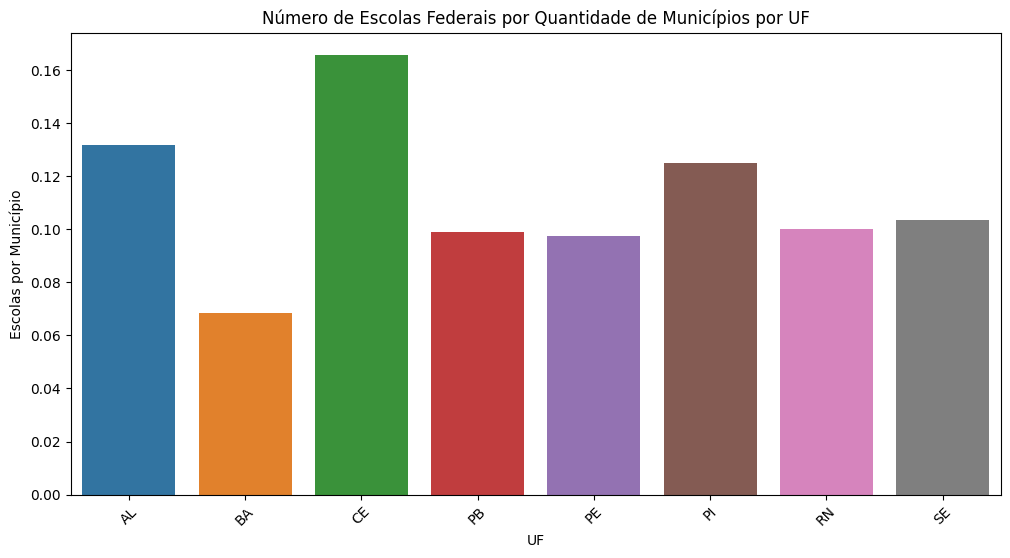

In [59]:
# Gráfico de Barras para Escolas por Quantidade de Municípios por UF
plt.figure(figsize=(12, 6))
sns.barplot(x='UF', y='Escolas federais por Município', data=QEdu_2019_somas)
plt.xlabel('UF')
plt.ylabel('Escolas por Município')
plt.title('Número de Escolas Federais por Quantidade de Municípios por UF')
plt.xticks(rotation=45)
plt.show()


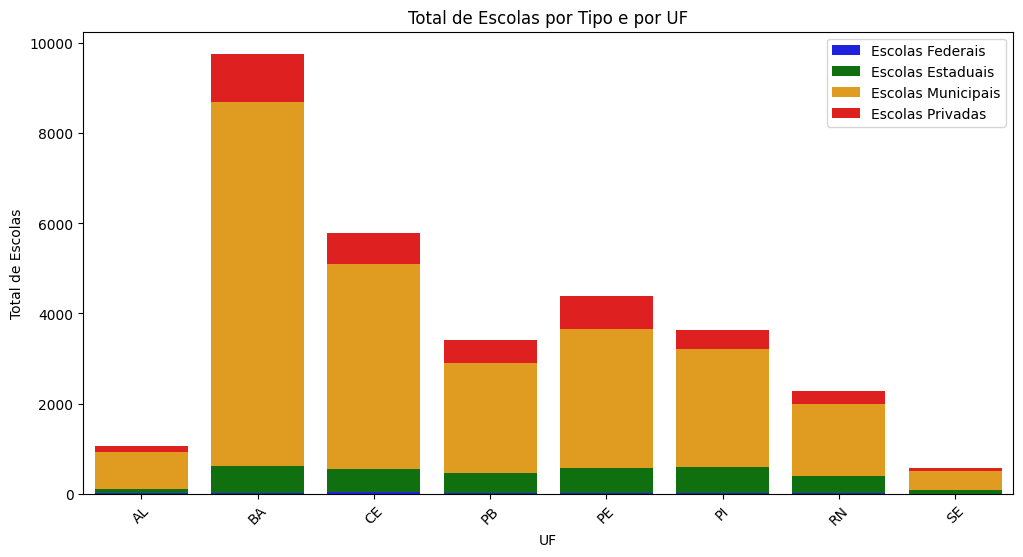

In [60]:
dados = QEdu_2019_somas[['UF', 'Total de escolas federais', 'Total de escolas estaduais', 'Total de escolas municipais', 'Total de escolas privadas']]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UF', y='Total de escolas federais', data=dados, label='Escolas Federais', color='blue')
ax = sns.barplot(x='UF', y='Total de escolas estaduais', data=dados, label='Escolas Estaduais', bottom=dados['Total de escolas federais'], color='green')
ax = sns.barplot(x='UF', y='Total de escolas municipais', data=dados, label='Escolas Municipais', bottom=dados['Total de escolas federais'] + dados['Total de escolas estaduais'], color='orange')
ax = sns.barplot(x='UF', y='Total de escolas privadas', data=dados, label='Escolas Privadas', bottom=dados['Total de escolas federais'] + dados['Total de escolas estaduais'] + dados['Total de escolas municipais'], color='red')

plt.xlabel('UF')
plt.ylabel('Total de Escolas')
plt.title('Total de Escolas por Tipo e por UF')
plt.xticks(rotation=45)
plt.legend()

plt.show()

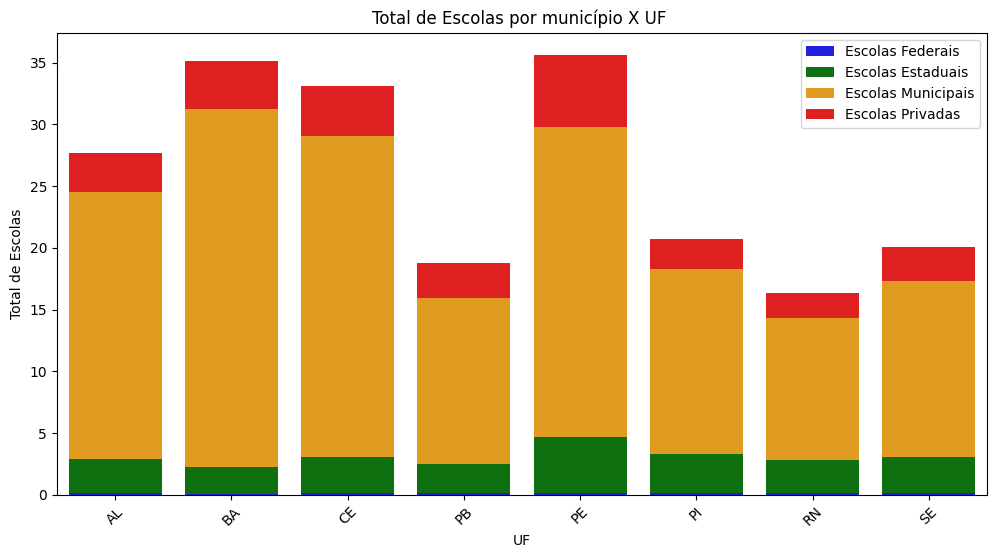

In [61]:
dados = QEdu_2019_somas[['UF', 'Escolas federais por Município', 'Escolas estaduais por Município', 'Escolas municipais por Município', 'Escolas privadas por Município']]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='UF', y='Escolas federais por Município', data=dados, label='Escolas Federais', color='blue')
ax = sns.barplot(x='UF', y='Escolas estaduais por Município', data=dados, label='Escolas Estaduais', bottom=dados['Escolas federais por Município'], color='green')
ax = sns.barplot(x='UF', y='Escolas municipais por Município', data=dados, label='Escolas Municipais', bottom=dados['Escolas federais por Município'] + dados['Escolas estaduais por Município'], color='orange')
ax = sns.barplot(x='UF', y='Escolas privadas por Município', data=dados, label='Escolas Privadas', bottom=dados['Escolas federais por Município'] + dados['Escolas estaduais por Município'] + dados['Escolas municipais por Município'], color='red')

plt.xlabel('UF')
plt.ylabel('Total de Escolas')
plt.title('Total de Escolas por município X UF ')
plt.xticks(rotation=45)
plt.legend()

plt.show()

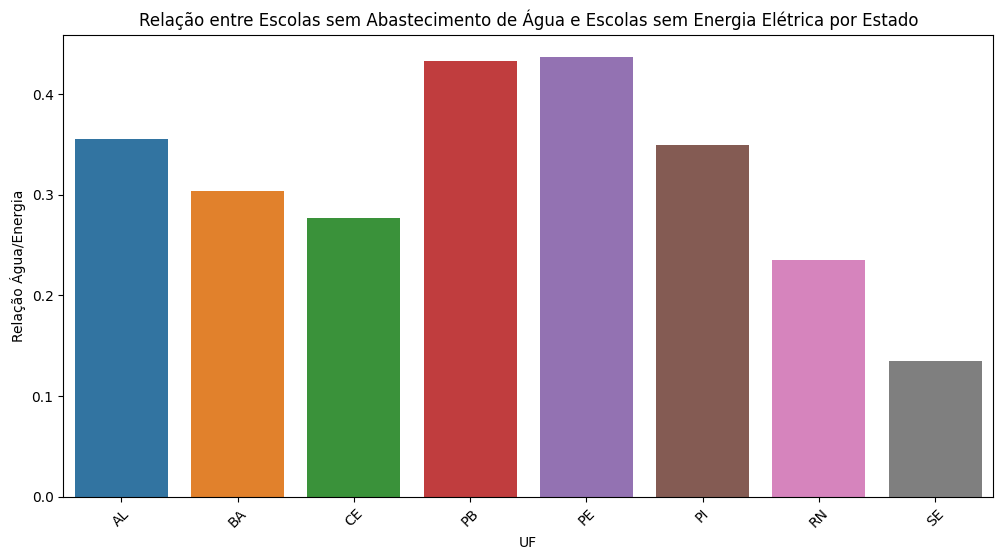

In [62]:
# Calcule a relação entre escolas sem abastecimento de água e escolas sem energia elétrica
QEdu_2019_somas['Relação Água/Escolas'] = QEdu_2019_somas['Total de escolas que não tem abastecimento de água da rede pública'] / QEdu_2019_somas['Total de escolas']
QEdu_2019_somas['Relação Energia/EscolasEnergia'] = QEdu_2019_somas['Total de escolas que não possuem energia elétrica'] / QEdu_2019_somas['Total de escolas']

# Crie um gráfico de barras para a relação Água/Energia por estado
plt.figure(figsize=(12, 6))
sns.barplot(x='UF', y='Relação Água/Escolas', data=QEdu_2019_somas)
#sns.barplot(x='UF', y='Relação Energia/EscolasEnergia', data=QEdu_2019_somas)
plt.xlabel('UF')
plt.ylabel('Relação Água/Energia')
plt.title('Relação entre Escolas sem Abastecimento de Água e Escolas sem Energia Elétrica por Estado')
plt.xticks(rotation=45)
plt.show()

In [63]:
# Gráfico de Dispersão para Docentes vs. Total de Escolas
plt.figure(figsize=(10, 6))
QEdu_2019_filtrado['Total de docentes em Nível Médio'] = QEdu_2019_filtrado['Total de docentes em Nível Médio']
sns.scatterplot(x='Total de escolas federais', y='Total de docentes em Nível Médio', data=QEdu_2019_filtrado)
plt.xlabel('Total de Escolas Federais')
plt.ylabel('Total de Docentes em Nível Médio')
plt.title('Relação entre Total de Escolas Federais e Total de Docentes em Nível Médio')
plt.show()


KeyError: 'Total de docentes em Nível Médio'

<Figure size 1000x600 with 0 Axes>

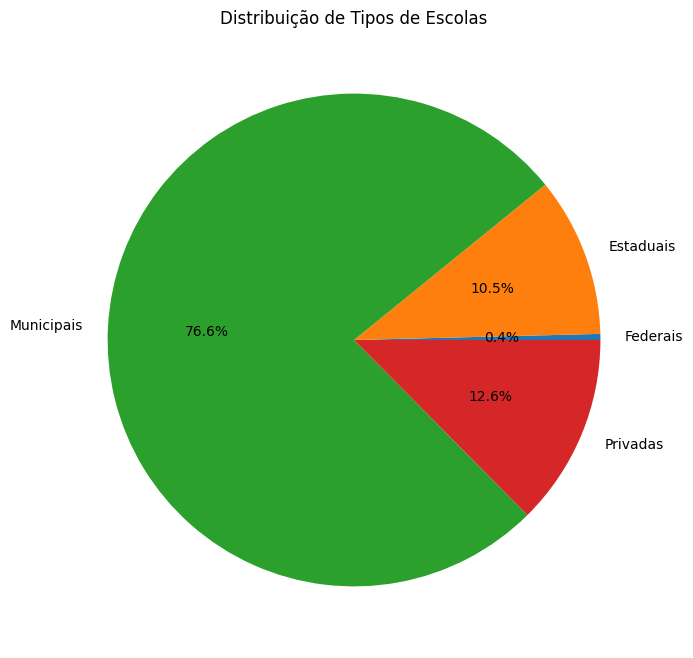

In [ ]:

# Gráfico de Pizza para Tipo de Escolas (Federal, Estadual, Municipal, Privada)
tipo_escolas = ['Total de escolas federais', 'Total de escolas estaduais', 'Total de escolas municipais', 'Total de escolas privadas']
total_tipo_escolas = [QEdu_2019_filtrado[tipo].sum() for tipo in tipo_escolas]
plt.figure(figsize=(8, 8))
plt.pie(total_tipo_escolas, labels=['Federais', 'Estaduais', 'Municipais', 'Privadas'], autopct='%1.1f%%')
plt.title('Distribuição de Tipos de Escolas')
plt.show()



In [ ]:
print(QEdu_2019_filtrado['UF'])

2       BA
5       PE
6       PE
9       BA
10      MA
        ..
1788    CE
1789    BA
1790    PI
1792    BA
1793    BA
Name: UF, Length: 1171, dtype: object


In [ ]:
shape(QEdu_2019_filtrado['UF'])

NameError: name 'shape' is not defined

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 3 with shape (1171,).

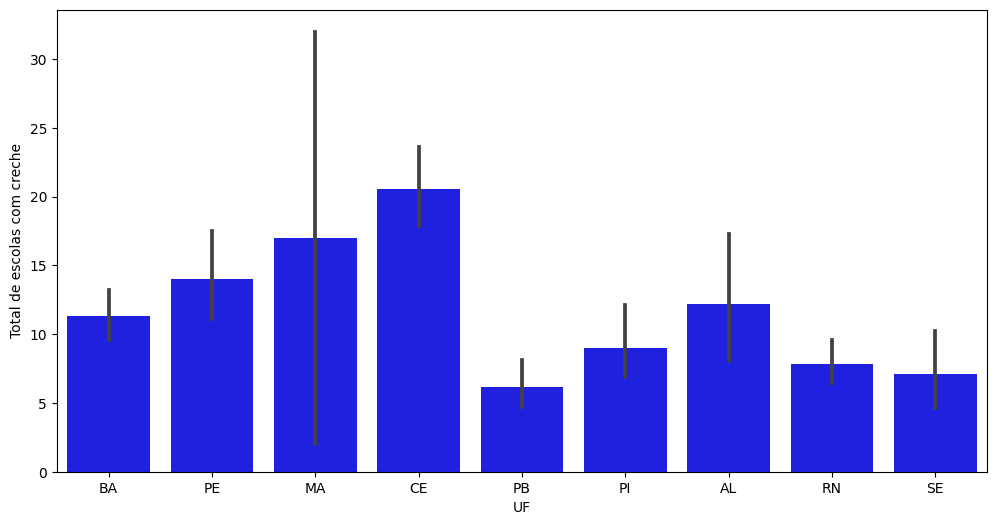

In [ ]:
# Gráfico de Barras Empilhadas para Escolas com/sem Creche por UF

plt.figure(figsize=(12, 6))
sns.barplot(x='UF', y='Total de escolas com creche', data=QEdu_2019_filtrado, label='Com Creche', color='b')
sns.barplot(x='UF', y='Total de escolas sem creche', data=QEdu_2019_filtrado, label='Sem Creche', bottom=QEdu_2019_filtrado['Total de escolas com creche'], color='r')
plt.xlabel('UF')
plt.ylabel('Total de Escolas')
plt.title('Total de Escolas com e Sem Creche por UF')
plt.xticks(rotation=45)
plt.legend()
plt.show()



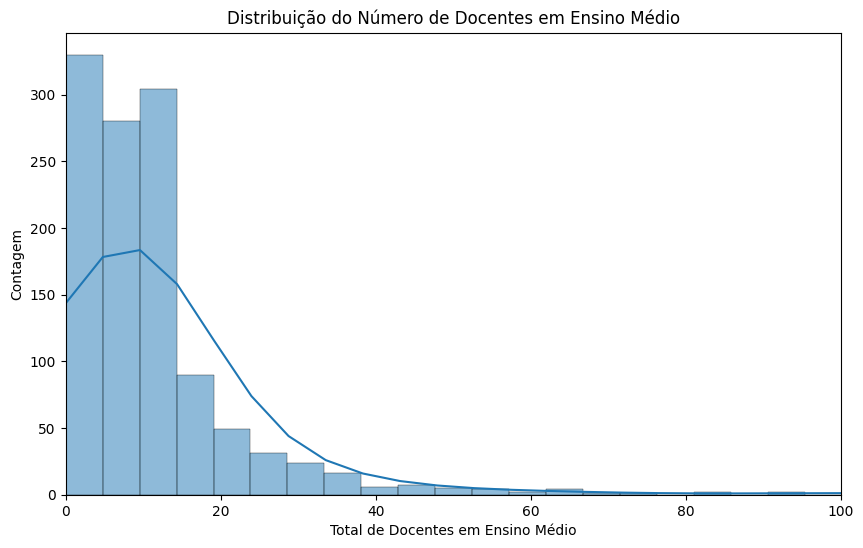

In [ ]:
# Histograma Docentes ensino médio
plt.figure(figsize=(10, 6))
sns.histplot(QEdu_2019_filtrado['Total de docentes em Ensino Médio'], bins=200, kde=True)
plt.xlabel('Total de Docentes em Ensino Médio')
plt.ylabel('Contagem')
plt.title('Distribuição do Número de Docentes em Ensino Médio')

plt.xlim(0,100) 

plt.show()

In [ ]:
# Read Censo Data
censo_df = pd.read_csv("/work/Censo_municipal_estadual_nacional (csv).csv",delimiter=";")

# Filter Relevant Columns
mask_censo = [
"UF",
#"UFN",
"Município",
"MORT1",
"SOBRE40",
"SOBRE60",
"T_ANALF11A14",
"T_ANALF15A17",
"T_ANALF15M",
"T_ANALF18A24",
"T_ANALF18M",
"T_ANALF25A29",
"T_ANALF25M",
"GINI",
"HOMEM65A69",
"HOMEM70A74",
"HOMEM75A79",
"HOMEMTOT",
"HOMENS80",
"MULH0A4",
"MULH10A14",
"MULH15A19",
"MULH20A24",
"MULH25A29",
"MULH30A34",
"MULH35A39",
"MULH40A44",
"MULH5A9",
"MULH60A64",
"MULH65A69",
"MULH70A74",
"MULH75A79",
"MULHER80",
"MULHERTOT",
"PEA",
"PEA1014",
"PEA1517",
"PEA18M",
"IDHM",
"IDHM_E",
"IDHM_L",
"IDHM_R"]

# Filtered dataframe
censo_df = censo_df[mask_censo]
censo_df


,UF,Município,MORT1,SOBRE40,SOBRE60,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,...,MULHER80,MULHERTOT,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R
0,11,ALTA FLORESTA D'OESTE,45.58,83.81,66.87,9.74,8.35,23.55,10.82,25.71,...,25,11146,NaN,NaN,NaN,NaN,0.329,0.112,0.617,0.516
1,11,ARIQUEMES,32.39,88.08,74.23,9.35,7.64,17.18,8.00,18.37,...,47,27318,NaN,NaN,NaN,NaN,0.432,0.199,0.684,0.593
2,11,CABIXI,41.52,85.09,69.00,9.62,6.19,24.57,10.06,27.10,...,8,3584,NaN,NaN,NaN,NaN,0.309,0.108,0.636,0.430
3,11,CACOAL,35.37,87.08,72.44,6.32,6.70,21.41,9.22,23.29,...,94,34032,NaN,NaN,NaN,NaN,0.407,0.171,0.667,0.593
4,11,CEREJEIRAS,43.00,84.62,68.20,5.06,4.83,20.26,8.17,22.29,...,28,9367,NaN,NaN,NaN,NaN,0.386,0.167,0.629,0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,52,VIANÓPOLIS,14.40,93.03,82.02,0.66,0.74,7.97,1.31,8.52,...,97,6251,6657.0,122.0,334.0,6201.0,0.712,0.622,0.818,0.710
16691,52,VICENTINÓPOLIS,15.70,92.47,80.75,1.22,1.32,12.68,2.40,13.51,...,36,3498,3922.0,84.0,175.0,3663.0,0.684,0.562,0.804,0.707
16692,52,VILA BOA,14.50,93.02,81.98,3.60,1.56,15.88,3.98,17.07,...,12,2147,2008.0,18.0,28.0,1962.0,0.647,0.534,0.818,0.619
16693,52,VILA PROPÍCIO,15.90,92.36,80.50,4.15,1.99,19.25,4.18,20.75,...,23,2456,2200.0,48.0,76.0,2076.0,0.634,0.505,0.802,0.629


In [ ]:
censo_df[mask_censo]

,UF,Município,MORT1,SOBRE40,SOBRE60,T_ANALF11A14,T_ANALF15A17,T_ANALF15M,T_ANALF18A24,T_ANALF18M,...,MULHER80,MULHERTOT,PEA,PEA1014,PEA1517,PEA18M,IDHM,IDHM_E,IDHM_L,IDHM_R
0,11,ALTA FLORESTA D'OESTE,45.58,83.81,66.87,9.74,8.35,23.55,10.82,25.71,...,25,11146,NaN,NaN,NaN,NaN,0.329,0.112,0.617,0.516
1,11,ARIQUEMES,32.39,88.08,74.23,9.35,7.64,17.18,8.00,18.37,...,47,27318,NaN,NaN,NaN,NaN,0.432,0.199,0.684,0.593
2,11,CABIXI,41.52,85.09,69.00,9.62,6.19,24.57,10.06,27.10,...,8,3584,NaN,NaN,NaN,NaN,0.309,0.108,0.636,0.430
3,11,CACOAL,35.37,87.08,72.44,6.32,6.70,21.41,9.22,23.29,...,94,34032,NaN,NaN,NaN,NaN,0.407,0.171,0.667,0.593
4,11,CEREJEIRAS,43.00,84.62,68.20,5.06,4.83,20.26,8.17,22.29,...,28,9367,NaN,NaN,NaN,NaN,0.386,0.167,0.629,0.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,52,VIANÓPOLIS,14.40,93.03,82.02,0.66,0.74,7.97,1.31,8.52,...,97,6251,6657.0,122.0,334.0,6201.0,0.712,0.622,0.818,0.710
16691,52,VICENTINÓPOLIS,15.70,92.47,80.75,1.22,1.32,12.68,2.40,13.51,...,36,3498,3922.0,84.0,175.0,3663.0,0.684,0.562,0.804,0.707
16692,52,VILA BOA,14.50,93.02,81.98,3.60,1.56,15.88,3.98,17.07,...,12,2147,2008.0,18.0,28.0,1962.0,0.647,0.534,0.818,0.619
16693,52,VILA PROPÍCIO,15.90,92.36,80.50,4.15,1.99,19.25,4.18,20.75,...,23,2456,2200.0,48.0,76.0,2076.0,0.634,0.505,0.802,0.629


In [ ]:
pip install xlr

ERROR: Could not find a version that satisfies the requirement xlr (from versions: none)
ERROR: No matching distribution found for xlr

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 40.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b6e046c8-57b3-47c6-bce9-1538a03fcdec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>